### MP Neuron is the basic Nueron

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.18.0'

In [5]:
data = keras.datasets.mnist.load_data()

In [6]:
type(data)

tuple

In [7]:
type(data[0])

tuple

In [8]:
type(data[0][0])

numpy.ndarray

In [9]:
data[0][0].shape

(60000, 28, 28)

In [10]:
data[0][1].shape

(60000,)

In [11]:
data[1][0].shape

(10000, 28, 28)

In [12]:
data[1][1].shape

(10000,)

In [13]:
(X_train, y_train), (X_test, y_test) = data

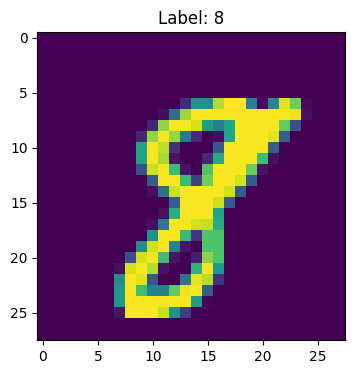

In [14]:
plt.figure(figsize=(6,4))
# plt.matshow(X_train[55])
plt.imshow(X_train[55])
plt.title(f"Label: {y_train[55]}")
plt.show()

In [15]:
X_train_flat = X_train.reshape((len(X_train), 28*28))
X_test_flat = X_test.reshape((len(X_test), 28*28))

In [16]:
X_train_flat.shape

(60000, 784)

#### Creating First Model

This model doesn't have hidden layers, it has single layer of weights

Input&nbsp;&nbsp;&nbsp;&nbsp;Output<br>
784&nbsp;&nbsp;&nbsp;X&nbsp;&nbsp;&nbsp;10

In [19]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(28*28,), activation="sigmoid")
])

model1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model1.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7730 - loss: 17.3824
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8777 - loss: 6.1903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8817 - loss: 5.8747
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8868 - loss: 5.2872
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8900 - loss: 5.1339
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8893 - loss: 5.1272
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8872 - loss: 5.2957
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8875 - loss: 5.1768
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8911 - loss: 5.0777
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8938 - loss: 5.0630


In [21]:
model2 = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(28*28,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

In [22]:
model2.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8751 - loss: 8.6904
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9402 - loss: 0.3534
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9433 - loss: 0.3384
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9473 - loss: 0.2803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9496 - loss: 0.2784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9549 - loss: 0.2656
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9577 - loss: 0.2316
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9627 - loss: 0.1923
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9597 - loss: 0.2138
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9635 - loss: 0.1937


In [23]:
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

In [24]:
X_train_scaled[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
model3 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(28*28,), activation="sigmoid")
])

model3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

In [26]:
model3.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8189 - loss: 0.7224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.3059
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9191 - loss: 0.2852
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9246 - loss: 0.2720
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9262 - loss: 0.2636
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9282 - loss: 0.2595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9291 - loss: 0.2610
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9296 - loss: 0.2540
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9315 - loss: 0.2434
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9306 - loss: 0.2520


In [27]:
model3.evaluate(X_train_scaled, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9329 - loss: 0.2417


[0.24331636726856232, 0.9329000115394592]

### creating Model that flatten the image inside

In [32]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

C:\Users\Nikhil Vishwakarma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model4.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8800 - loss: 7.5638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9397 - loss: 0.3426
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9432 - loss: 0.3431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9502 - loss: 0.2809
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9541 - loss: 0.2603
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9552 - loss: 0.2698
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9606 - loss: 0.2093
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9607 - loss: 0.2159
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9655 - loss: 0.1799
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9658 - loss: 0.1772


In [35]:
y_test_pred = model4.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
y_test_labels = [np.argmax(i) for i in y_test_pred]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_test_labels)

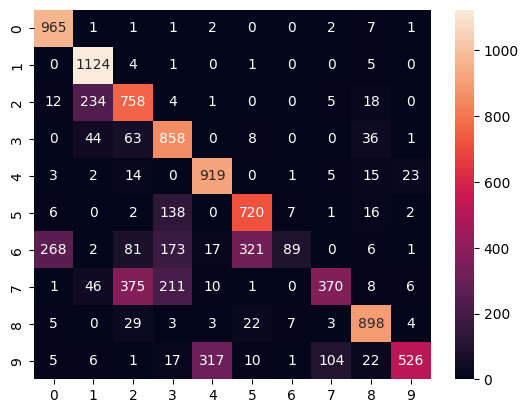

In [62]:
# plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Activation Function

In [65]:
def sigmoid(x):
    import math as m
    return 1/(1+m.exp(-x))

In [67]:
sigmoid(100)

1.0

In [69]:
sigmoid(1)

0.7310585786300049

In [71]:
sigmoid(-5)

0.0066928509242848554

In [73]:
sigmoid(-100)

3.7200759760208356e-44

In [81]:
def tanh(x):
    from math import exp
    return (exp(x)-exp(-x))/(exp(x)+exp(-x))

In [83]:
tanh(100)

1.0

In [85]:
tanh(-100)

-1.0

In [87]:
def relu(x):
    return max(0,x)

In [89]:
relu(573)

573

In [91]:
def leaky_relu(x):
    return max(0.1*x, x)

In [93]:
leaky_relu(-100)

-10.0

In [95]:
leaky_relu(100)

100

In [123]:
def elu(x):
    from math import exp
    return max(0.1*(exp(x)-1), x)

In [129]:
elu(-100000)

-0.1

### Cost Functions

In [132]:
y = np.array([1,0,1,1,1,0])
yhat = np.array([0.9,0.3,0.85,0.8,0.7,0.15])

In [134]:
def mse(y_actual, y_predicted):
    total_error = 0
    for i,j in zip(y_actual, y_predicted):
        total_error += (i - j) ** 2
    print("Total Error:",total_error)
    mean_squared_error = total_error / len(y_actual)
    return mean_squared_error

In [136]:
mse(y, yhat)

Total Error: 0.275


0.04583333333333334

In [138]:
np.mean(np.square(y-yhat))

0.04583333333333334

In [147]:
def mae(y_actual, y_predicted):
    total_error = 0
    for i,j in zip(y_actual, y_predicted):
        total_error += abs(i - j)
    print("Total Error:",total_error)
    mean_absolute_error = total_error / len(y_actual)
    return mean_absolute_error

In [149]:
mae(y,yhat)

Total Error: 1.2


0.19999999999999998

In [151]:
np.mean(np.abs(y-yhat))

0.19999999999999998

In [189]:
def log_loss(y_actual, y_predicted):
    total_error = 0
    for y, y_hat in zip(y_actual, y_predicted):
        factor = 1e-15
        match(y_hat):
            case 0:
                y_hat += factor
            case 1:
                y_hat -= factor
            case _:
                pass
        total_error += y * np.log(y_hat) + (1-y) * np.log(1-y_hat)
    print("Total Error:",total_error)
    return -(total_error / len(y_actual))

In [191]:
log_loss(yhat,y)

Total Error: -41.44713137196547


6.907855228660911

In [173]:
1e-5

1e-05